In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#圖形辨識  UCI 

## 模擬版資料做SVM

In [11]:
x = np.array([[6,6],[10,8],[3,7],[8,7]])

In [87]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [88]:
x[:,0]

array([ 6, 10,  3,  8])

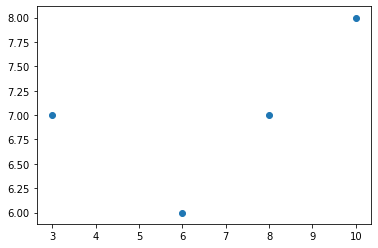

In [121]:
plt.scatter(x[:,0],x[:,1])

In [13]:
y=np.array([1, 2, 1, 2])

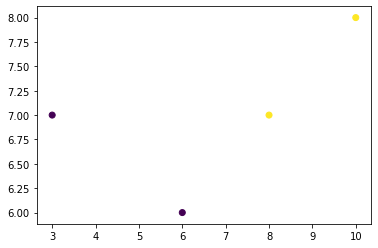

In [123]:
plt.scatter(x[:,0],x[:,1],c=y)

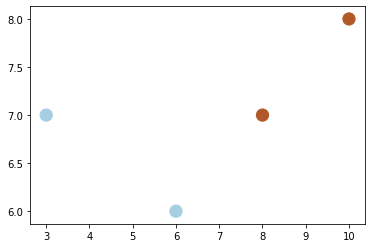

In [124]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired', s=150)#s 為size

### Step 1. 打開函數學習機

In [8]:
from sklearn.svm import SVC

In [9]:
clf = SVC(gamma='auto')  #gamma 為了不出現警告

### Step 2. 學習

In [14]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 警告處理 -↖gamma控制資料分類的精確度

## Step 3. 預測

In [15]:
y_predict = clf.predict(x)

In [16]:
y_predict

array([1, 2, 1, 2])

In [17]:
y

array([1, 2, 1, 2])

In [18]:
xr = np.random.rand(100)

In [79]:
xr #只介於0-1之間

array([0.79264683, 0.57254152, 0.33284148, 0.94005783, 0.00558924,
       0.24562763, 0.75892798, 0.10105726, 0.11753969, 0.12745756,
       0.00330921, 0.78038804, 0.67152453, 0.19380998, 0.490572  ,
       0.40399021, 0.67417006, 0.96993264, 0.08979928, 0.47190527,
       0.45880193, 0.51838882, 0.55886175, 0.71383453, 0.29903128,
       0.43864748, 0.48029368, 0.8983843 , 0.05320495, 0.78516145,
       0.51037546, 0.80311608, 0.63186878, 0.33951965, 0.62318335,
       0.79307569, 0.64715574, 0.30890927, 0.00383288, 0.1839479 ,
       0.55414082, 0.68858404, 0.64211475, 0.35497309, 0.98831599,
       0.9246417 , 0.78844077, 0.8916948 , 0.23793315, 0.33813113,
       0.62211802, 0.10076854, 0.94611672, 0.26157659, 0.99940627,
       0.74587153, 0.58644888, 0.48285075, 0.72952763, 0.33587808,
       0.34438781, 0.64564114, 0.0384747 , 0.96275374, 0.07227869,
       0.41791649, 0.40953114, 0.21930382, 0.2351711 , 0.4185542 ,
       0.50710871, 0.8357336 , 0.30595061, 0.15086811, 0.94476

In [132]:
xr2 = np.random.rand(100)*7+3 #3-10
yr=np.random.rand(100)*2+6

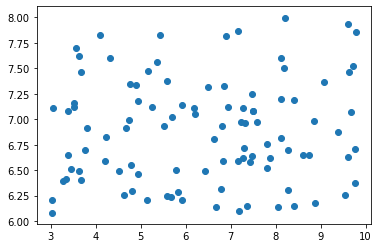

In [133]:
plt.scatter(xr2,yr)

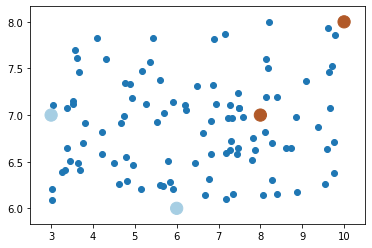

In [134]:
plt.scatter(xr2,yr)
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired', s=150)#s 為size

In [135]:
print('X',xr2[:5])
print('Y',yr[:5])

X [9.38502411 5.52372046 8.10787462 6.8614268  4.21374612]
Y [6.87414613 6.92862879 6.82005746 7.32520492 6.58596765]


In [136]:
X=np.c_[xr2,yr]
Y=clf.predict(X)

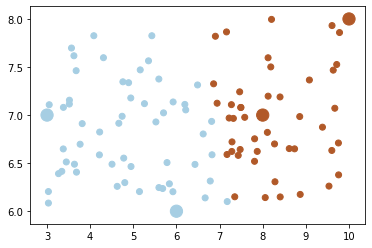

In [137]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired', s=150)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

### 結果呈現

In [3]:
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8,50)

In [4]:
X=np.c_[x_list,y_list]

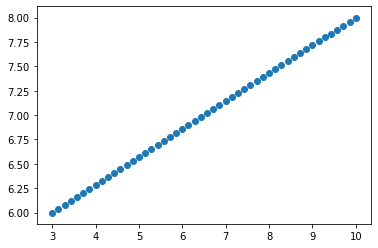

In [5]:
plt.scatter(X[:,0],X[:,1])#只有50個在對角線的點  sol:meshgrid

In [29]:
##--------------------正解如下

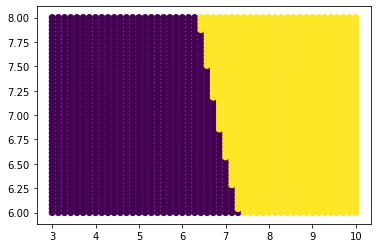

In [19]:
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8,50)
X,Y=np.meshgrid(x_list,y_list) #important 現在是矩陣
P=np.c_[X.ravel(),Y.ravel()]  #ravel 拉平
C=clf.predict(P)
plt.scatter(P[:,0],P[:,1],c=C)

## 插播:contour 用法(等高線)

In [33]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y=np.meshgrid(xL,yL)

In [34]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [35]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [36]:
Z = np.random.randint(1,3,(4,4)) #3>x>=1

In [37]:
Z

array([[1, 2, 2, 1],
       [1, 2, 2, 1],
       [2, 1, 2, 2],
       [1, 2, 2, 1]])

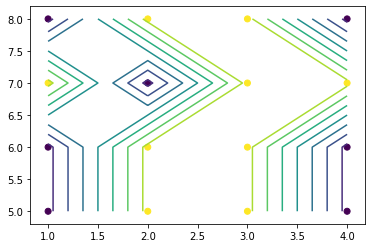

In [39]:

plt.contour(X,Y,Z)
plt.scatter(X.ravel(), Y.ravel(),c=Z.ravel())#ravel 矩陣拉平

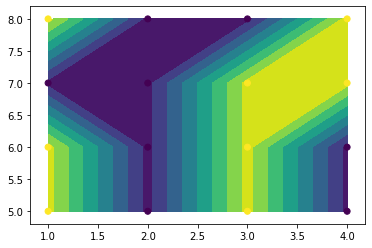

In [40]:
Z = np.random.randint(1,3,(4,4))
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(), Y.ravel(),c=Z.ravel()) #劃出所有，系統認為山不可能只有一個等高線，其他自己補上

## 資料視覺化終極版

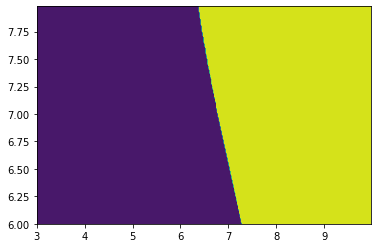

In [46]:
x_arr = np.arange(3,10,0.02)
y_arr = np.arange(6,8,0.02)
X,Y=np.meshgrid(x_arr,y_arr)

P =np.c_[X.ravel(),Y.ravel()]
##
z=clf.predict(P)
Z=z.reshape(X.shape)

plt.contourf(X,Y,Z)


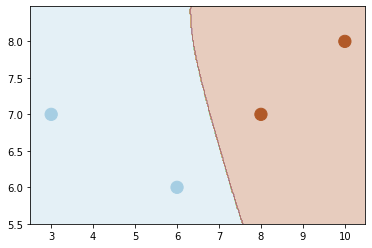

In [49]:
x_arr = np.arange(2.5,10.5,0.02)
y_arr = np.arange(5.5,8.5,0.02)
X,Y=np.meshgrid(x_arr,y_arr)

P =np.c_[X.ravel(),Y.ravel()]
##
z=clf.predict(P)
Z=z.reshape(X.shape)

plt.contourf(X,Y,Z, cmap="Paired",alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired', s=150)#s 為size

## 鳶尾花數據庫

In [50]:
from sklearn.datasets import load_iris

In [51]:
iris = load_iris()

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
x= iris.data
y= iris.target

In [54]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [55]:
x[:,0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [58]:
X=x[:,:2]

In [59]:
Y=y

In [61]:
len(X)

150

### 區分訓練資料 、測試資料

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

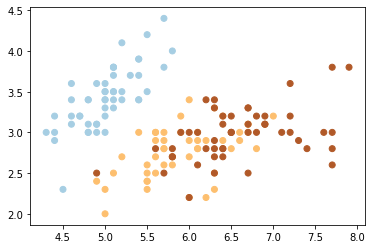

In [66]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

### Step 1. 開一台函數學習機

In [69]:
clf = SVC(gamma='auto')

### Step 2.訓練

In [70]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [71]:
y_predict=clf.predict(x_test)

In [72]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [73]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [74]:
y_predict-y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

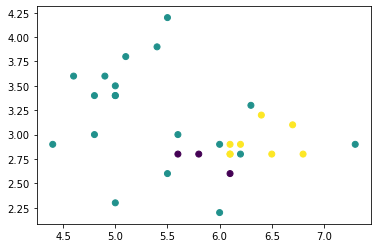

In [75]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_predict-y_test)

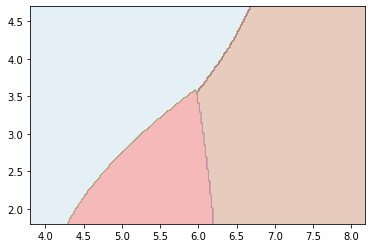

In [76]:
x0 = np.arange(3.8,8.2,0.02)
y0 = np.arange(1.8,4.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap="Paired",alpha=0.3)

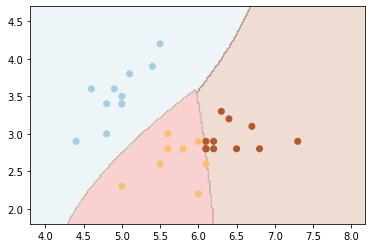

In [78]:
x0 = np.arange(3.8,8.2,0.02)
y0 = np.arange(1.8,4.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap="Paired",alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap='Paired',c=y_predict)

In [ ]:
## 後兩個
#全要